# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:
from sklearn.utils import shuffle

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_test, y_test = shuffle(x_test, y_test, random_state=42)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[7]


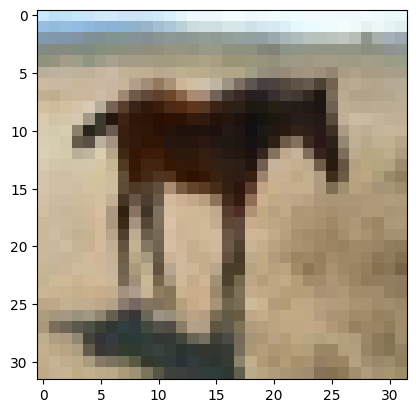

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [8]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                      

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [9]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15



1563/1563 [==============================] - 13s 7ms/step - loss: 1.6938 - accuracy: 0.3839 - val_loss: 1.3983 - val_accuracy: 0.4845
Epoch 2/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4348 - accuracy: 0.4846 - val_loss: 1.3143 - val_accuracy: 0.5160
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3539 - accuracy: 0.5188 - val_loss: 1.3514 - val_accuracy: 0.5156
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3048 - accuracy: 0.5388 - val_loss: 1.2101 - val_accuracy: 0.5769
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2780 - accuracy: 0.5543 - val_loss: 1.1551 - val_accuracy: 0.6009
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2579 - accuracy: 0.5599 - val_loss: 1.2093 - val_accuracy: 0.5832
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2532 - accuracy: 0.5641 - val_loss: 1.1779 - val_accuracy: 0.5

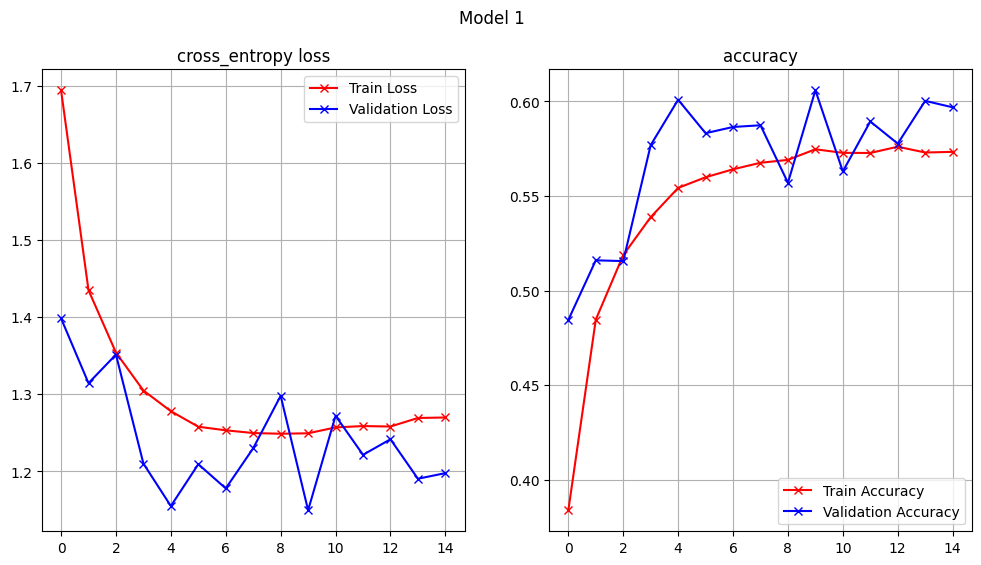

In [10]:
def plot_loss_accuracy(history,title):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

    plt.suptitle(title)


plot_loss_accuracy(history_1, 'Model 1')

In [11]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1977704763412476
Test accuracy: 0.5968999862670898


### ***Model 1 has two convolutional layers followed by max pooling and dropout layers for regularization. The Conv2D consists of 32 filters that detects features in the input data, and it moves two pixels at a time which is based on the number of strides. Max pooling reduce the spatial dimensions of the input. Then, flattening of data is necessary since one-dimensional input is required by the fully connected layers.***

### ***The model resulted to a low accuracy of 59% and a loss of 1.19. The graph also shows that the model is performing poorly on predicting the validation sets. There's a lot of fluctuations which indicates instability and inconsistency. Furthermore, adjusting the model's hyperparameters and modifying its structure might improve its performance.***

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [12]:
# Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification
model_2 = Sequential()

model_2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())

model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))


model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                      

### ***Model 1 has a total parameters of 181,162 while model 2 has 232,426. Upon comparing the two models, model 2 has higher parameter count since it has more convolutional layers. Having more parameters might give the model more capacity to learn complex patterns from the data, but it might also overfit if not properly regularized.***

In [13]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 44s 27ms/step - loss: 1.7401 - accuracy: 0.3667 - val_loss: 1.5179 - val_accuracy: 0.4671
Epoch 2/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3927 - accuracy: 0.5075 - val_loss: 1.2987 - val_accuracy: 0.5350
Epoch 3/5
1563/1563 [==============================] - 38s 25ms/step - loss: 1.2782 - accuracy: 0.5544 - val_loss: 1.3127 - val_accuracy: 0.5499
Epoch 4/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2300 - accuracy: 0.5757 - val_loss: 1.1814 - val_accuracy: 0.5976
Epoch 5/5
1563/1563 [==============================] - 38s 25ms/step - loss: 1.2106 - accuracy: 0.5896 - val_loss: 1.1331 - val_accuracy: 0.6165


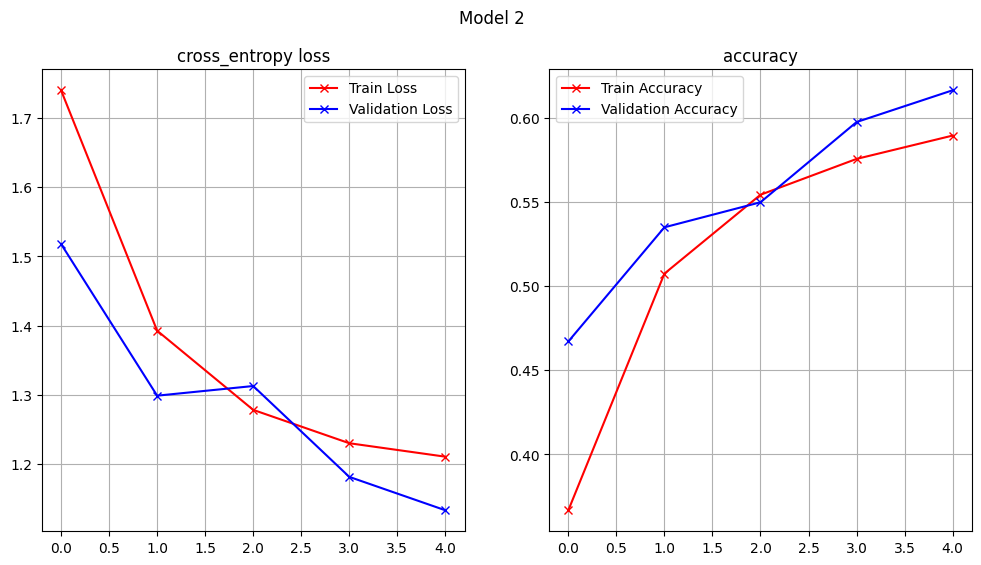

In [14]:
plot_loss_accuracy(history_2, 'Model 2')

In [15]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1331125497817993
Test accuracy: 0.6165000200271606


### ***Compared to Model 1, Model 2 has more complex pattern: Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification. Based on the graph and the result, this model 2 is slightly better at predicting the validation set with an accuracy of approximately 62% and a loss of 1.13. It's also more stable in increasing the accuracy compared to the first model. However, despite of improvement, there's still a minimal presence of fluctuations in the loss of unseen data.***


In [16]:
model_3 = Sequential()

model_3.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', 
                   input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3))

model_3.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3))

model_3.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.4))

model_3.add(Flatten())
model_3.add(Dense(1024)) 
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 activation_10 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 activation_11 (Activation)  (None, 16, 16, 256)       0         
                                                      

### ***Model 3 has the most number of parameters compared to two earlier models above. It has a total count of 9,878,794. By adding these parameters, the model can learn more the complex patterns in the data, and might increase the accuracy as long as appropriate hyperparameter are set.***

### ***To compare the training time of the three models, Model 3 is the slowest but only in a slight difference of almost 3 minutes. It is understandable since it has the most parameters for the model to learn. In addition, more complex models often require longer training times compared to models with lesser layers.***

In [17]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

opt = keras.optimizers.RMSprop(lr=0.0005)

model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
              batch_size=100,
              epochs=50,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping])

Epoch 1/50
500/500 [==============================] - 199s 396ms/step - loss: 1.7950 - accuracy: 0.3501 - val_loss: 1.4040 - val_accuracy: 0.5117
Epoch 2/50
500/500 [==============================] - 195s 390ms/step - loss: 1.2821 - accuracy: 0.5432 - val_loss: 1.1043 - val_accuracy: 0.6046
Epoch 3/50
500/500 [==============================] - 195s 391ms/step - loss: 1.0563 - accuracy: 0.6280 - val_loss: 0.9100 - val_accuracy: 0.6825
Epoch 4/50
500/500 [==============================] - 196s 391ms/step - loss: 0.9240 - accuracy: 0.6791 - val_loss: 0.7819 - val_accuracy: 0.7256
Epoch 5/50
500/500 [==============================] - 196s 392ms/step - loss: 0.8347 - accuracy: 0.7106 - val_loss: 0.7769 - val_accuracy: 0.7365
Epoch 6/50
500/500 [==============================] - 196s 391ms/step - loss: 0.7720 - accuracy: 0.7342 - val_loss: 0.6838 - val_accuracy: 0.7707
Epoch 7/50
500/500 [==============================] - 199s 398ms/step - loss: 0.7223 - accuracy: 0.7522 - val_loss: 0.6691 -

### ***In this model, early stopping is implemented with a patience of 5. It means that the model will stop training when the validation loss is not improving for 5 consecutive epochs. This also helps to prevent overfitting.***

### ***Upon comparing the training time of the three models, model 1 is the fastest with an average of approximately 11 seconds per epoch, followed by model 2 with 35 seconds average per epoch. The slowest training time is the model three with approximately 3 minutes average per epoch. It's observable that the model with most parameters to learn was the one that got the longest time to train. It's understandable since model 3 requires more computation due to its having more layers.*** 

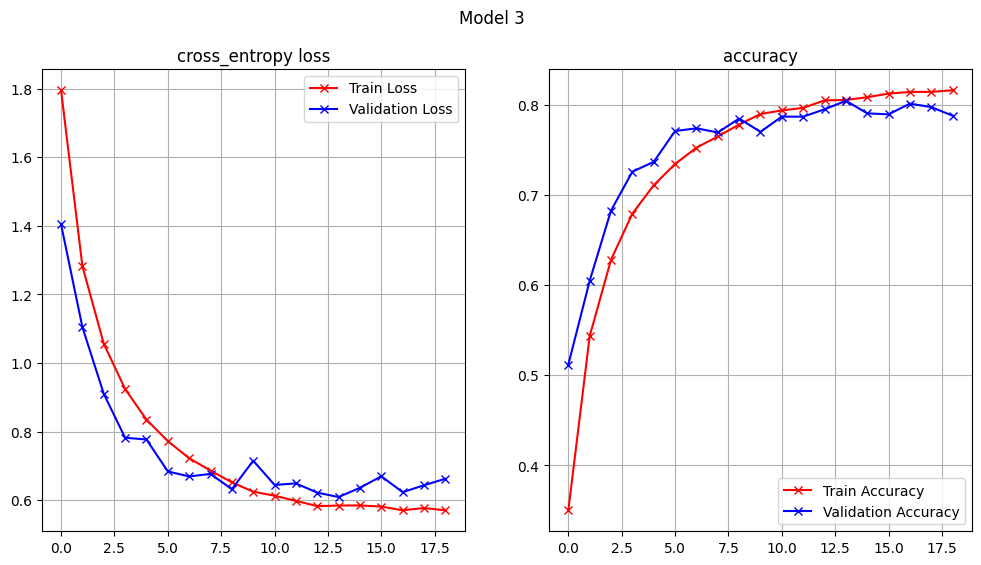

In [18]:
plot_loss_accuracy(history_3, 'Model 3')

In [19]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6091310977935791
Test accuracy: 0.8041999936103821


### ***For this model 3, I created multiple convolutional layers with max pooling layers and dropout layers. The model consists of convolutional layers which has filters that look for specific patterns in the images. All of it use a 3x3 filter size. Then, max pooling layers come after the convolutional layers which reduce the size of the feature. Moreover, dropout layers are utilized to help prevent overfitting by randomly dropping out some units during the training. I set it with a rate of 30%, 40%, and 50%. After flattening the output, dense layer is created with 1024 neurons. Regularization techniques are also applied, and softmax is used to obtain the class probabilities.***

### ***The result of model 3 is the best so far, it also has the highest number of parameters. Though the accuracy is not really high at 80% and a loss of 0.60, it still shows better performance compared to the two models above with 59% and 62% accuracy. As the number of epochs increases, the accuracy for training set also increases, and the loss decreases. This means that the model is learning from the training data. For validation set, little fluctuations are still evident. This might still be improved by experimenting and analyzing more the hyperparameters of the model.*** 

------------------------------------------

### ***Conclusion:***

### ***To sum up, this activity helped me to understand the construction and training of convolutional neural networks (CNNs) using the CIFAR-10 dataset. I also evaluate it using the accuracy and loss metrics. In this task, I was able to create three models with different structures and hyperparameters. The one that got the best performance and longest time to train is the model 3. Among the models, it is the most complex with multiple convolutional layers, max pooling, dropout layers, and a dense layer with 1024 neurons. It achieved the highest accuracy of approximately 80% and a loss of 0.60. In addition, early stopping is used to prevent overfitting and to save time in training the data.***